# Modeling recruitment time series from 'astsa' package as an AR process

Vamos a intentar fittear un AR a los datos y estimar sus parámetros.

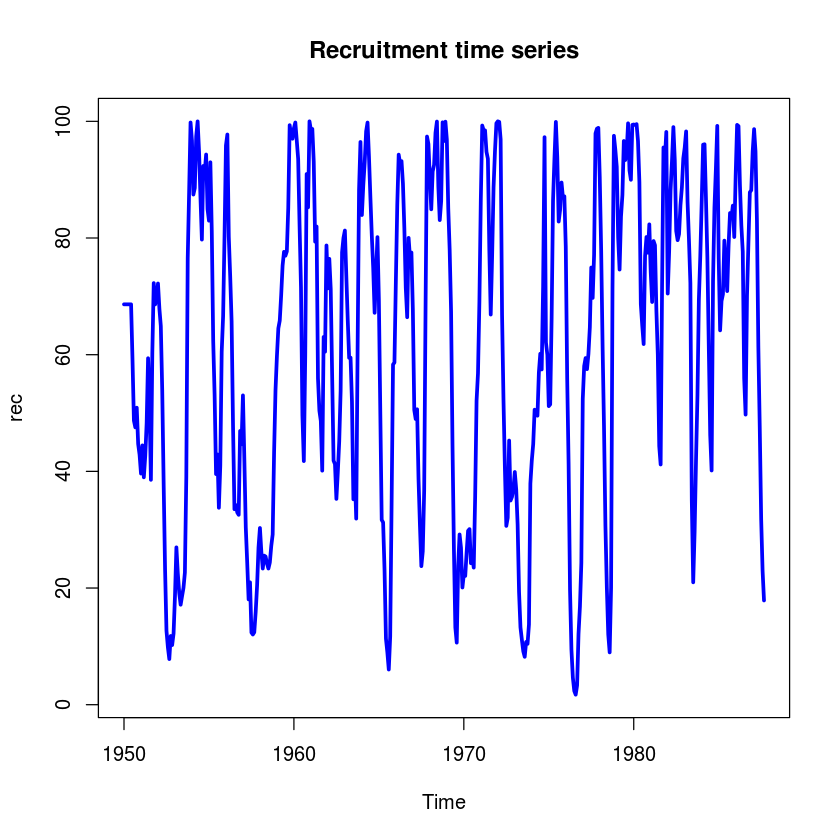

In [3]:
library(astsa)
my.data=rec

# Plot rec 
plot(rec, main='Recruitment time series', col='blue', lwd=3)

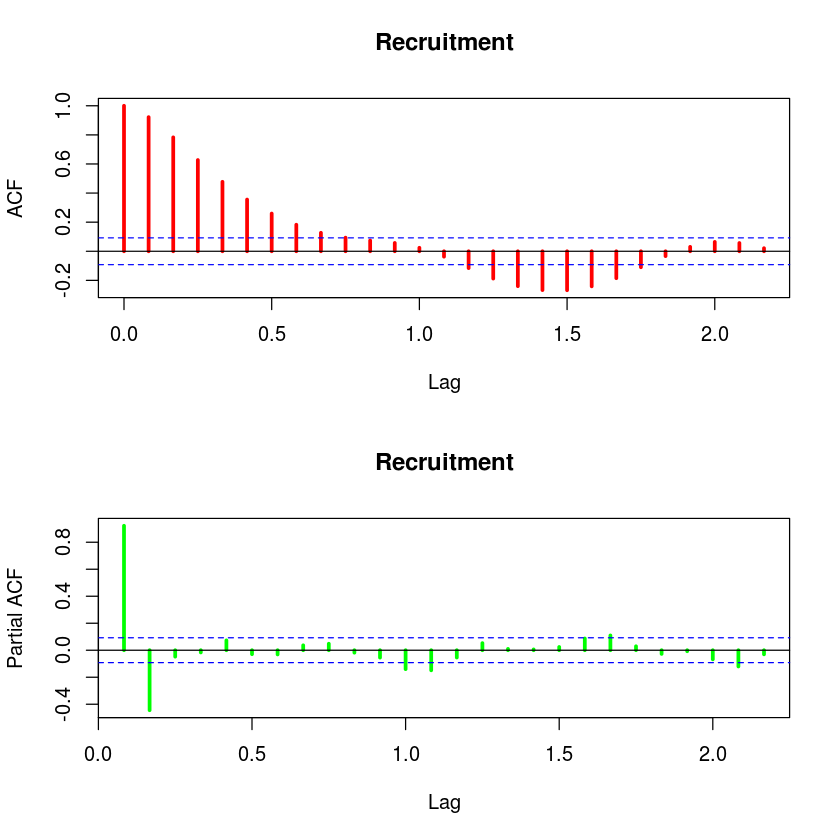

In [4]:
# subtract mean to get a time series with mean zero
ar.process=my.data-mean(my.data)

# ACF and PACF of the process
par(mfrow=c(2,1))
acf(ar.process, main='Recruitment', col='red', lwd=3)
pacf(ar.process, main='Recruitment', col='green', lwd=3)

Al ver la PACF vemos que podemos modelarlo con un $AR(2)$.

In [13]:
# order
p=2

# sample autocorreleation function r
r=NULL
r[1:p]=acf(ar.process, plot=F)$acf[2:(p+1)]
cat('r=',r,'\n')

r= 0.9218042 0.7829182 


In [15]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 2 by 2, with entries all 1's.

# define non-diagonal entries of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

[,1]      [,2]     
[1,] 1.0000000 0.9218042
[2,] 0.9218042 1.0000000

In [7]:
# b-column vector on the right
b=NULL
b=matrix(r,p,1)# b- column vector with no entries
b

[,1]     
[1,] 0.9218042
[2,] 0.7829182

In [8]:
# solve(R,b) solves Rx=b, and gives x=R^(-1)b vector
phi.hat=NULL
phi.hat=solve(R,b)[,1]
phi.hat

[1]  1.3315874 -0.4445447

In [9]:
#variance estimation using Yule-Walker Estimator
c0=acf(ar.process, type='covariance', plot=F)$acf[1]
c0

[1] 780.991

In [10]:
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 94.17131

In [11]:
# constant term in the model
phi0.hat=mean(my.data)*(1-sum(phi.hat))
phi0.hat

[1] 7.033036

In [14]:
cat("Constant:", phi0.hat," Coefficients:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 7.033036  Coefficients: 1.331587 -0.4445447  and Variance: 94.17131 
